In [1]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound

Number of no delays points of the signal y[n-no]: 1
Enter the 1th delay point : 1
Enter the 1th point coefficient: 1
Number of no delays points of the signal x[n-no]: 1
Enter the 1th delay point : 0
Enter the 1th point coefficient: 1


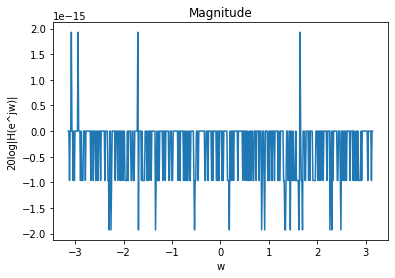

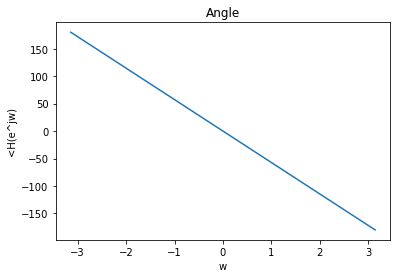

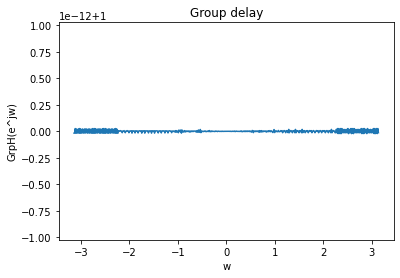

The Group delay here is 1.0000000000000262


In [44]:
#1
n = int(input('Number of no delays points of the signal y[n-no]: '))
N = np.zeros(n)                # the delay values i.e no
a_y = np.zeros(n)              # coefficient 
for i in range(int(n)):        #User defining the signal
        N[i] = int(input('Enter the ' + str(i+1) + 'th delay point : '))
        a_y[i] = float(input('Enter the ' + str(i+1) + 'th point coefficient: '))
m = int(input('Number of no delays points of the signal x[n-no]: '))
M = np.zeros(m)
a_x = np.zeros(m)
for i in range(int(m)):        #User defining the signal
        M[i] = float(input('Enter the ' + str(i+1) + 'th delay point : '))
        a_x[i] = float(input('Enter the ' + str(i+1) + 'th point coefficient: '))        
def LCCD(N,M,a_y,a_x,w):
    z=(np.cos(w)+(np.sin(w)*1j))
    H=np.zeros(len(w))+(np.zeros(len(w))*1j)
    H_M=np.zeros(len(w))             #magnitude
    H_A=np.zeros(len(w))             #angle
    H_G=np.zeros(len(w))             #gorup delay
    for j in range(len(w)):
        H1=0
        H2=0
        for i in range(len(N)):
            H1+=a_y[i]*(z[j]**(-N[i]))         #summation and finding denominator
        for i in range(len(M)):
            H2+=a_x[i]*(z[j]**(-M[i]))         #summation and finding numerator
        H[j]=np.real(H1/H2)+(np.imag(H1/H2)*1j)
        H_M[j]=20*np.log(abs(H[j]))/np.log(10)  #magnitude
        H_A[j]=np.angle(H[j],deg=True)
        if j>1:
            H_G[j]=-(H_A[j]-H_A[j-1])/(w[j]-w[j-1])*(np.pi/180)          #differentiating angle
        elif j==1:
            H_G[j]=-(H_A[j]-H_A[j-1])/(w[j]-w[j-1])*(np.pi/180) 
            H_G[j-1]=H_G[j] 

    f1 = plt.figure(1) 
    plt.plot(w,H_M)
    plt.xlabel('w')
    plt.ylabel('20log|H(e^jw)|')
    plt.title('Magnitude')
    f2 = plt.figure(2) 
    plt.plot(w,H_A)
    plt.xlabel('w')
    plt.ylabel('<H(e^jw)')
    plt.title('Angle')  
    f3 = plt.figure(3) 
    plt.plot(w,H_G)
    plt.xlabel('w')
    plt.ylabel('GrpH(e^jw)')
    plt.title('Group delay')  
    plt.show()  
    return(H_G)
w=np.linspace(-np.pi,np.pi,num=500)
A=LCCD(N,M,a_y,a_x,w)
print("The Group delay here is",A[2]) 

# Example
> y[n-1]=x[n] <br>
> H(z)=Z <br>
> Phase is linear.

In [98]:
#2
def conv(x, h, n):
    x = np.hstack((np.zeros(np.sum(n < 0)), np.array(x)))          #adding zeros at beginning 
    h = np.flip(h)

    n  =  x.shape[0]
    m = h.shape[0]
    pads = np.zeros(m-1)
    x =  np.hstack((pads, x, pads))
    y = np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])    #summing all possible indexes
    return y
def DTFT(data,w):              # data is the numpy array of signal, w is frequency,n is the sequence scale.
    N = len(w) # Number of points for w.
    DTFT = np.zeros(N)+np.ones(N)*1j# Initializing DTFT
    for i in range(N):  # calculating DTFT
        dtft = 0
        for k in range(len(data)):
            dtft += data[k]*(np.cos(w[i]*k)+(np.sin(w[i]*k)*1j)) 
        DTFT[i]=dtft
    dtft_G = np.zeros(N)   
    #MagnitudeSpectrum and Phase spectrum
    dtft_mag = [] #Magnitude Array
    dtft_phi = [] #Phase Array
    for i in range(N):#Calculating phase and magnitude
        dtft_mag+=[abs(DTFT[i])]#Magnitude = root(real^2 + img^2)
        dtft_phi+=[np.angle(DTFT[i],deg=True)]#Phase=arctan(img/real)
    for i in range(N): 
        if i > 1:
            dtft_G[i]=-(dtft_phi[i]-dtft_phi[i-1])/(w[i]-w[i-1])*(np.pi/180)
        elif i==1:
            dtft_G[i]=-(dtft_phi[i]-dtft_phi[i-1])/(w[i]-w[i-1])*(np.pi/180)
            dtft_G[i-1]=dtft_G[i]
    f3=plt.figure(3,figsize=(12, 8))
    plt.plot(w,dtft_G)
    plt.xlabel('w')
    plt.ylabel('grp[H(e^jw)]')
    plt.title('groupdelay')
    return(DTFT,dtft_phi,dtft_G) 

The Group delay here is -0.5000000371484138


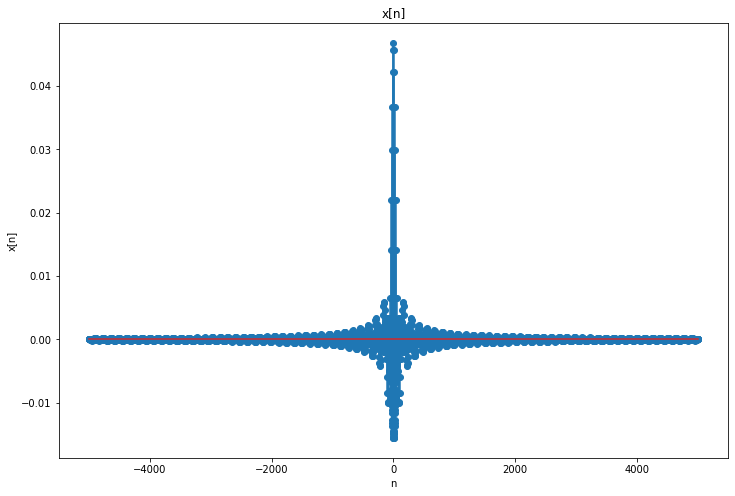

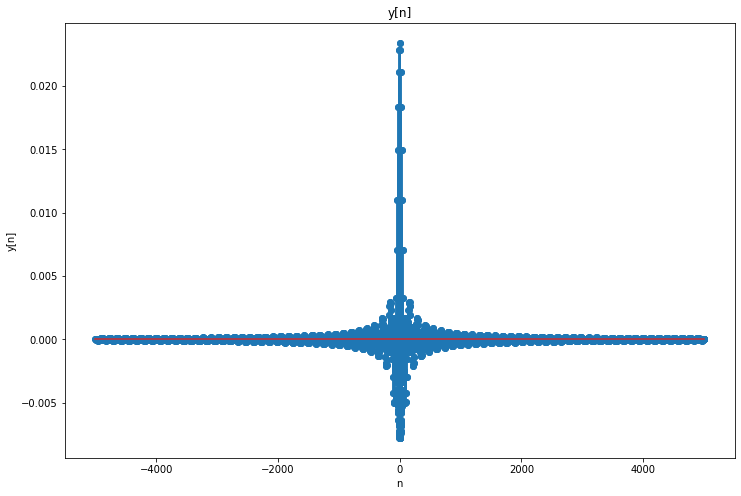

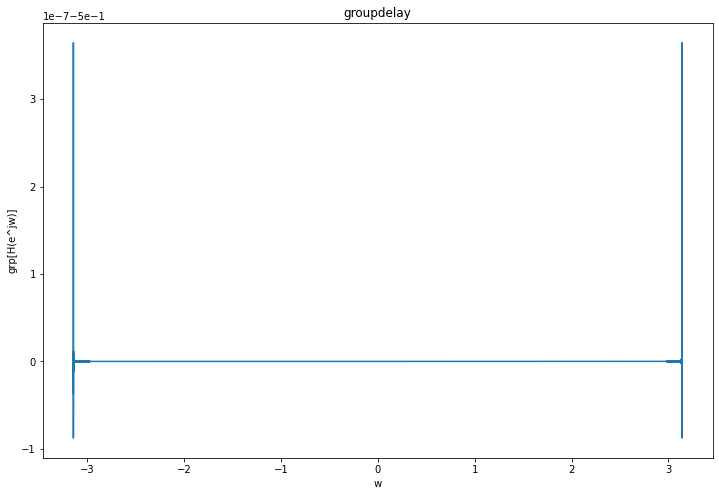

In [116]:
#2-a
h1=[0.5,0.5]
n=np.linspace(-5000,5000,num=10001)
n1=np.linspace(-5000,5001,num=10002)
w_0=(0.25)*np.pi            
w=0.015625*np.pi 
x=np.zeros(len(n))              #s[n] is sinc function
for i in range(len(n)):
    if n[i]==0:
        x[i]= (w/np.pi)*(np.cos(w_0*n[i])+np.cos(2*w_0*n[i])+np.cos(3*w_0*n[i]))      
    else:
        x[i]= np.sin(w*n[i])/(np.pi*n[i])*(np.cos(w_0*n[i])+np.cos(2*w_0*n[i])+np.cos(3*w_0*n[i]))
y=conv(h1,x,n)            #convolution
f1=plt.figure(1,figsize=(12, 8)) 
plt.stem(n,x,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x[n]')
f2=plt.figure(2,figsize=(12, 8))
plt.stem(n1,y[5000:],use_line_collection=True)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n]')
w1=np.linspace(-1*np.pi,1*np.pi,num=1000001)
H1,H2,H3=DTFT(h1,w1)
print("The Group delay here is",H3[5])

# observation 2-a
> y[n] is essentially symmentric around n=0.5 here  and since x[n] is symmetric around n=0.<br>
> we can say that x[n] is shifted by 0.5 to get y[n], but magnitude is not same and  group delay is also 0.5 here.<br>
> we can also expain this by y[n]=0.5(x[n]+x[n-1])

The Group delay here is -0.49999999475269724


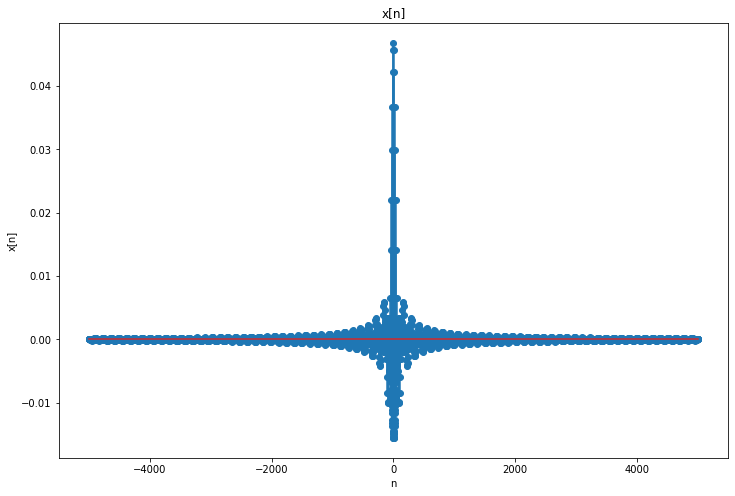

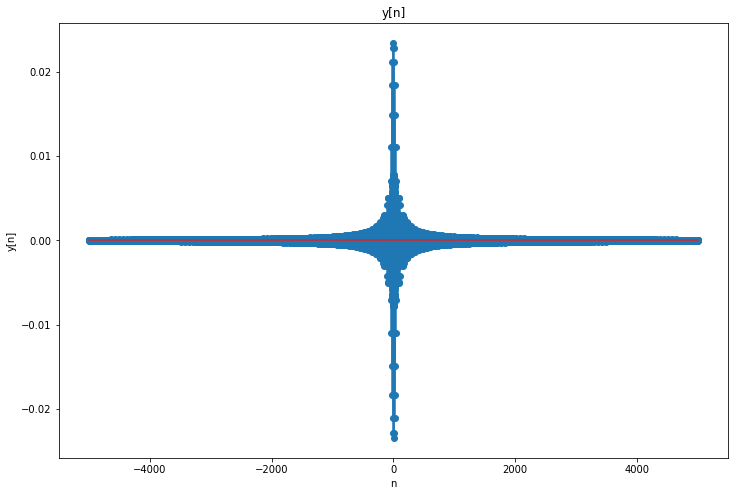

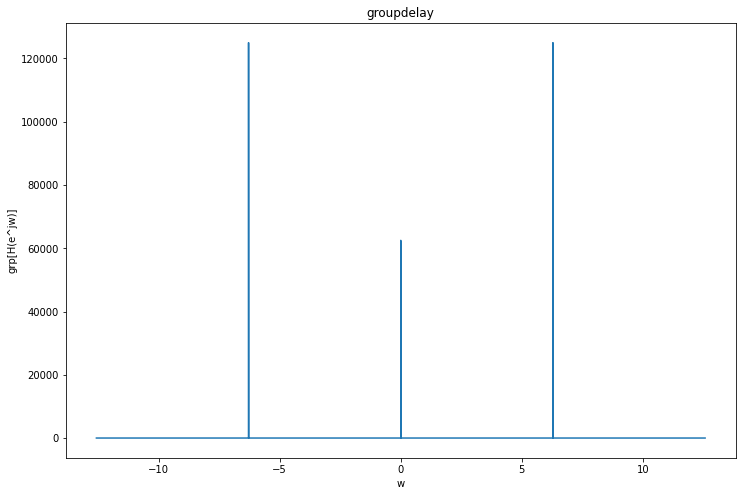

In [119]:
#2-b
h1=[0.5,-0.5]
n=np.linspace(-5000,5000,num=10001)
n1=np.linspace(-5000,5001,num=10002)
w_0=(0.25)*np.pi
w=0.015625*np.pi
x=np.zeros(len(n))
for i in range(len(n)):              #s[n] is sinc function
    if n[i]==0:
        x[i]= (w/np.pi)*(np.cos(w_0*n[i])+np.cos(2*w_0*n[i])+np.cos(3*w_0*n[i]))
    else:
        x[i]= np.sin(w*n[i])/(np.pi*n[i])*(np.cos(w_0*n[i])+np.cos(2*w_0*n[i])+np.cos(3*w_0*n[i]))
y=conv(h1,x,n)
f1=plt.figure(1,figsize=(12, 8))
plt.stem(n,x,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x[n]')
f2=plt.figure(2,figsize=(12, 8))
plt.stem(n1,y[5000:],use_line_collection=True)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n]')
w1=np.linspace(-4*np.pi,4*np.pi,num=1000001)
H1,H2,H3=DTFT(h1,w1)
print("The Group delay here is",H3[5])

# observation 2-b
> y[n] is essentially symmentric around n=0.5 here too and since x[n] is symmetric around n=0.<br>
> we can say that x[n] is shifted by 0.5 to get y[n] ,but magnitude  is not same and  group delay is also 0.5 here.<br>
> we can also expain this by y[n]=0.5(x[n]-x[n-1]) and y[n] is also symmetric around y=0

In [101]:
#3
def Audio_conv(sound_file,sound_conv,h,n):
    sound = wave.open(sound_file,'r') # reading the sound file
    # Extract Raw Audio from Wav File
    signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
    s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
    f_rate = sound.getframerate() # finding the framerate of the audio signal
    g = sound.getsampwidth()
    print(" Time of original audio is "+str(len(s)/f_rate)+"s")
    sound.close()
    soundnew = wave.open(sound_conv,'wb')      # opening new wave file                                # using the same file if duration of audio is less than 1 second
    Audio_conv = conv(s,h,n)
    data = Audio_conv.astype(np.uint8)         # converting array to int8 
    soundnew.setnchannels(1)                   # setting channels
    soundnew.setsampwidth(1)                   # setting sample width
    soundnew.setframerate(f_rate)              # setting frame rate
    soundnew.writeframesraw(data)              # writing data to frames
    soundnew.close()
    print("Time of new audio is "+str(len(data)/f_rate)+"s")
    return (Audio_conv)

In [102]:
h1=np.zeros(5000)    
s=1
w2=np.linspace(-np.pi,np.pi,num=1001)
h1=np.append(h1,s)
S=Audio_conv('alarm.wav','alarmlphase.wav',h1,np.linspace(0,len(h1)-1,num=len(h1)))#applying convolution and creating new wav file 
playsound('alarmlphase.wav')

 Time of original audio is 0.4895238095238095s
Time of new audio is 0.9430385487528344s


# observation 3
> As we can see the h1[n]=$\delta[n-5000]$ and so the group delay here is 5000 samples. which is 0.45s<br>\
> we have observed a delayed audio but the audio is same.
> The phase is linear here.

 Time of original audio is 0.4895238095238095s
Time of new audio is 0.5802267573696145s


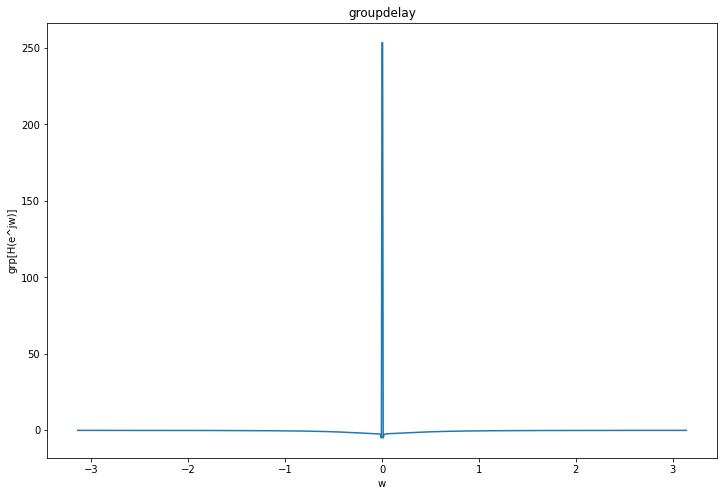

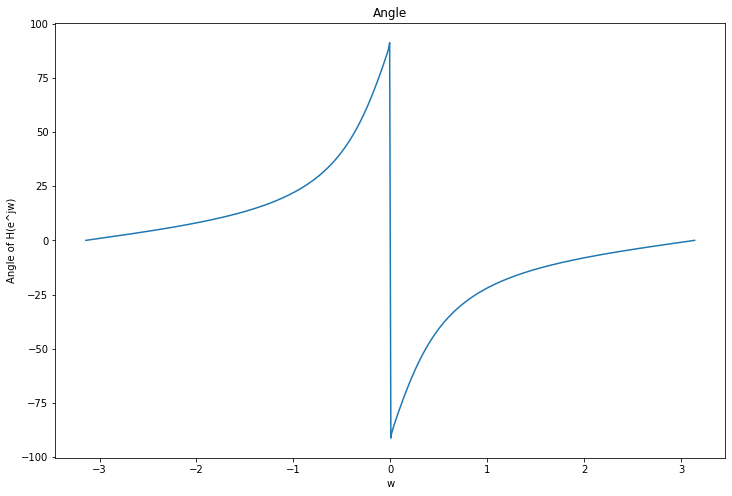

In [106]:
n=np.linspace(-10,10,num=1001)
w1=0.001*np.pi
h2=np.cos(5*w1*n)+np.sin(7*w1*n)
w3=np.linspace(-np.pi,np.pi,num=1001)
d,e,f=DTFT(h2,w3)
f1=plt.figure(1,figsize=(12, 8))
plt.plot(w3,e)
plt.xlabel('w')
plt.ylabel('Angle of H(e^jw)')
plt.title('Angle')
S=Audio_conv('alarm.wav','alarmnlphase.wav',h2,np.linspace(0,len(h2)-1,num=len(h2)))#applying convolution and creating new wav file 
playsound('alarmnlphase.wav')

# observation 3
> As we can see that it is non linear phase response.<br>
> we have observed a delayed audio also, the audio is very distorted.

In [104]:
h1=np.zeros(5000)
s=1
w2=np.linspace(-np.pi,np.pi,num=1001)
h1=np.append(h1,s)
S=Audio_conv('cry.wav','crylphase.wav',h1,np.linspace(0,len(h1)-1,num=len(h1)))#applying convolution and creating new wav file 
playsound('crylphase.wav')

 Time of original audio is 1.675827664399093s
Time of new audio is 2.129342403628118s


# observation 3
> As we can see the h1[n]=$\delta[n-5000]$ and so the group delay here is 5000 samples. which is 0.45s<br>\
> we have observed a delayed audio but the audio is same.
> The phase is linear here.

 Time of original audio is 1.675827664399093s
Time of new audio is 1.766530612244898s


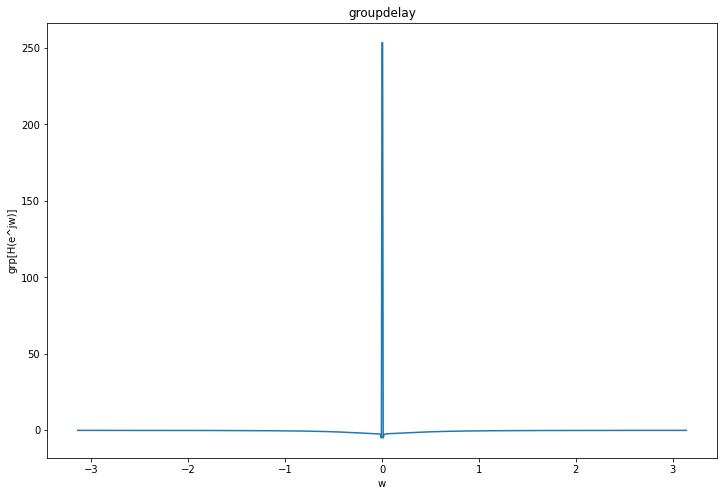

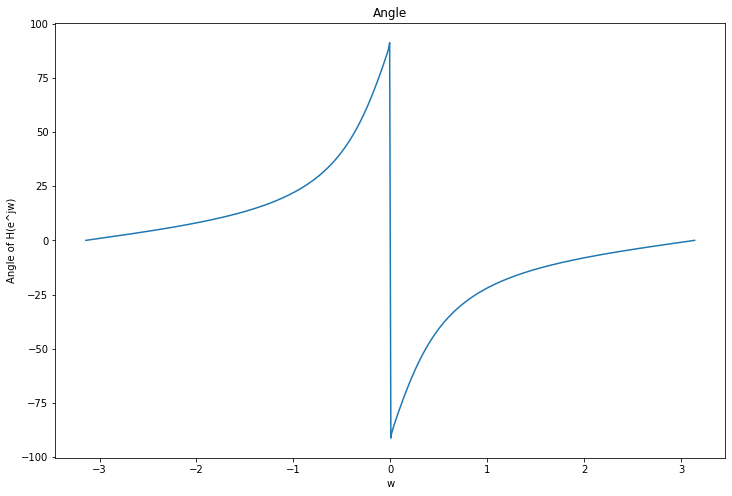

In [107]:
n=np.linspace(-10,10,num=1001)
w1=0.001*np.pi
h2=np.cos(5*w1*n)+np.sin(7*w1*n)
w3=np.linspace(-np.pi,np.pi,num=1001)
d,e,f=DTFT(h2,w3)
f1=plt.figure(1,figsize=(12, 8))
plt.plot(w3,e)
plt.xlabel('w')
plt.ylabel('Angle of H(e^jw)')
plt.title('Angle')
S=Audio_conv('cry.wav','crynlphase.wav',h2,np.linspace(0,len(h2)-1,num=len(h2)))#applying convolution and creating new wav file 
playsound('crynlphase.wav')

# observation 3
> As we can see that it is non linear phase response.<br>
> we have observed a delayed audio also, the audio is very distorted.